In [ ]:
import pandas as pd
import networkx as nx
from os.path import join
import numpy as np
from networkx.generators import intersection
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
KG_PATH = ''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
all_triples = pd.read_csv(join(KG_PATH, 'triples', 'kg_triples.csv'))

In [ ]:
all_triples.head()

,head,tail,rel,time_amin,time_amax,proba
0,coursera_--626KkxEeywagovoAKHOQ,hard_skills_7231,_provides,2005-01-01,2005-01-01,0.026316
1,coursera_-0BI9jXyEeWa2g6sjqf03Q,hard_skills_8402,_provides,2005-01-01,2005-01-01,0.001786
2,coursera_-0wI4W8lEeys9RJMWW48Yw,hard_skills_7085,_provides,2005-01-01,2005-01-01,0.013514
3,coursera_-1YwAnTLEeSjmyIAC0aXFg,hard_skills_8466,_provides,2005-01-01,2005-01-01,0.010638
4,coursera_-1cp1vgjEeyxiRKaoDccyw,hard_skills_7256,_provides,2005-01-01,2005-01-01,0.021739


In [ ]:
all_triples['head'].str.rsplit('_', 0).str[0].unique()

array(['coursera', 'function', 'hard', 'job', 'recruiters', 'soft'],
      dtype=object)

In [ ]:
def type_map(ent_name_):
    all_types = ['recruiters', 'sector', 'soft_skills', 'hard_skills', 'locations', 'function', 'coursera', 'job_titles']
    for i in all_types:
      if ent_name_.startswith(i):
        return i

def get_types(df_):
    df_['head_type'] = df_['head'].map(type_map)
    df_['tail_type'] = df_['tail'].map(type_map)
    return df_

In [ ]:
typed_df = get_types(df_ = all_triples)

In [ ]:
typed_df

,head,tail,rel,time_amin,time_amax,proba,head_type,tail_type
0,coursera_--626KkxEeywagovoAKHOQ,hard_skills_7231,_provides,2005-01-01,2005-01-01,0.026316,coursera,hard_skills
1,coursera_-0BI9jXyEeWa2g6sjqf03Q,hard_skills_8402,_provides,2005-01-01,2005-01-01,0.001786,coursera,hard_skills
2,coursera_-0wI4W8lEeys9RJMWW48Yw,hard_skills_7085,_provides,2005-01-01,2005-01-01,0.013514,coursera,hard_skills
3,coursera_-1YwAnTLEeSjmyIAC0aXFg,hard_skills_8466,_provides,2005-01-01,2005-01-01,0.010638,coursera,hard_skills
4,coursera_-1cp1vgjEeyxiRKaoDccyw,hard_skills_7256,_provides,2005-01-01,2005-01-01,0.021739,coursera,hard_skills
...,...,...,...,...,...,...,...,...
3063261,coursera_uJzic8tGEeq-exJhs1kTLQ,job_titles_9999,_favors,2013-04-18,2022-07-04,0.000091,coursera,job_titles
3063262,coursera_vTfefpnKEeqXRg45DDUIXQ,job_titles_9999,_favors,2013-04-18,2022-07-04,0.000091,coursera,job_titles
3063263,coursera_vdwtpp1hEeW4xRJkiwxnYw,job_titles_9999,_favors,2013-11-07,2013-11-07,0.000106,coursera,job_titles
3063264,coursera_wI5KCyMjEeu-rg7jvs9-1w,job_titles_9999,_favors,2013-11-07,2013-11-07,0.000106,coursera,job_titles


In [ ]:
typed_df['head_type'].unique()

array(['coursera', 'function', 'hard_skills', 'job_titles', 'recruiters',
       'soft_skills'], dtype=object)

In [ ]:
typed_df['tail_type'].unique()

array(['hard_skills', 'sector', 'job_titles', 'soft_skills', 'coursera',
       'function', 'locations', 'recruiters'], dtype=object)

In [ ]:
# job_titles: recruiters, sector, soft_skills, hard_skills, locations, function, coursera

In [ ]:
def property_completeness(all_triples):
    all_types = ['recruiters', 'sector', 'soft_skills', 'hard_skills', 'locations', 'function', 'coursera']
    grouped = all_triples.loc[all_triples['head'].str.startswith('job_titles', na=False)].groupby(['head'])
    cnt = 0
    sum_ = 0
    for name, group in tqdm(grouped):
        # print(group)
        # print(group['tail'].str.rsplit('_', 1).str[0])
        proertyset = set(list(group['tail'].str.rsplit('_', 1).str[0])).intersection(set(all_types))
        sum_ += (len(proertyset)/len(all_types))
        cnt += 1
    # print(sum_/cnt)
        # break
    return sum_/cnt
def schema_completeness(all_triples):
    all_types = ['recruiters', 'sector', 'soft_skills', 'hard_skills', 'locations', 'function', 'coursera']
    df_ = all_triples.loc[all_triples['head_type'].isin(['job_titles'])]
    x = list((df_.groupby('tail').count()/df_.shape[0])['head'])
    plt.hist(x)
    plt.show()  
    return 
    # for i in tqdm(list(df_['tail'])):
    #     property_completness[i] = df_[df_['tail'] == i].shape[0]/df_.shape[0]
    # return property_completness
    #     # break

In [ ]:
property_completeness(all_triples = all_triples)

  0%|          | 0/39669 [00:00<?, ?it/s]

0.7538524144436918


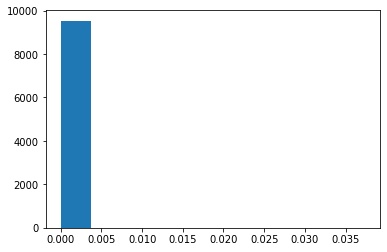

In [ ]:
schema_completeness(all_triples = all_triples)